Смоделировать игру против лотерейного автомата типа “777”. Игрок платит 1 руб., после чего выпадает случайное целое число, равномерно распределенное от 0 до 999. При некоторых значениях числа игрок получает выигрыш (см. справа)

Выгодна ли игра игроку?

Сколько в среднем приобретает
или теряет игрок за одну игру?

777: 200 руб.

999: 100 руб.

555: 50 руб.

333: 15 руб.

111: 10 руб.

*77: 5 руб.

**7: 3 руб.

*00: 2 руб.

**0: 1 руб.


    – любая цифра

Дополнительное задание повышенной сложности. Теоретически рассчитать средний выигрыш (проигрыш) и сравнить с результатами моделирования

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm


Количесво игр до полного банкротства: 1526593
Cредний выигрыш (проигрыш): -0.19651603276053276


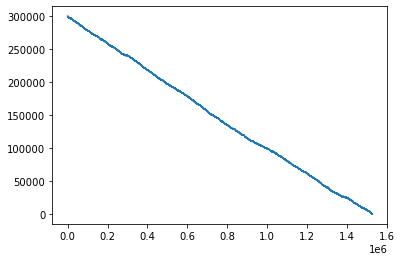

CPU times: user 26min 46s, sys: 0 ns, total: 26min 46s
Wall time: 26min 55s


In [117]:
%%time
n_games = 10_000_000
user_sum = 300_000 # игрок начинает с 300000 руб
ballance = np.array([])
for i in tqdm(range(n_games)):
    user_sum -= 1
    rnd = np.random.randint(1000)
    if rnd == 777:
        user_sum += 200
    elif rnd % 100 == 77:
        user_sum += 5
    elif rnd % 10 == 7:
        user_sum += 3
    if rnd == 999:
        user_sum += 100
    if rnd == 555:
        user_sum += 50
    if rnd == 333:
        user_sum += 15
    if rnd == 111:
        user_sum += 10
    if rnd % 100 == 0:
        user_sum += 2
    elif rnd % 10 == 0:
        user_sum += 1
        
    ballance = np.append(ballance, user_sum)
    
    if user_sum <= 0:
        break
print(f'Количесtво игр до полного банкротства: {i}',
      f'Cредний выигрыш (проигрыш): {(user_sum - 300_000)/i}',
      sep='\n')
plt.plot(ballance)
plt.show()

In [120]:
# Теоретически рассчитать средний выигрыш (проигрыш)
(-1 +  # Плата за игру 
200 * 1 / 1000 +  # вероятность выпадения 777 и выигрыш 200
100 * 1 / 1000 +  # вероятность выпадения 999 и выигрыш 100
50 * 1 / 1000 +  # вероятность выпадения 555 и выигрыш 50
15 * 1 / 1000 +  # вероятность выпадения 333 и выигрыш 15
10 * 1 / 1000 +  # вероятность выпадения 111 и выигрыш 10
5 * 9 / 1000 +  # вероятность выпадения *77 и выигрыш 5 (777 не учитываем)
3 * (100 - 9) / 1000 +  # вероятность выпадения **7 и выигрыш 3 (777 и *77 не учитываем)
2 * 10 / 1000 +  # вероятность выпадения *00 в т.ч 000 и выигрыш 2 
1 * (100 - 10) / 1000 # вероятность выпадения *0 и выигрыш 1 (*00 не учитываем)
)

-0.19699999999999993

In [121]:
-0.19651603276053276 + 0.19699999999999993

0.00048396723946717013

In [122]:
np.sum(np.arange(1000) % 100 == 0), np.sum(np.arange(1000) % 10 == 0)

(10, 100)